# DSA210 Term Project

In [ ]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict
from datetime import datetime, timedelta
import json

# Youtube Data in November
- As I started to collect my Youtube data starting from 25th November there is only single week of data from November.
- First graph is about how many videos that I watched in each day.
- Second graph is about comparing frequency of the video categories.

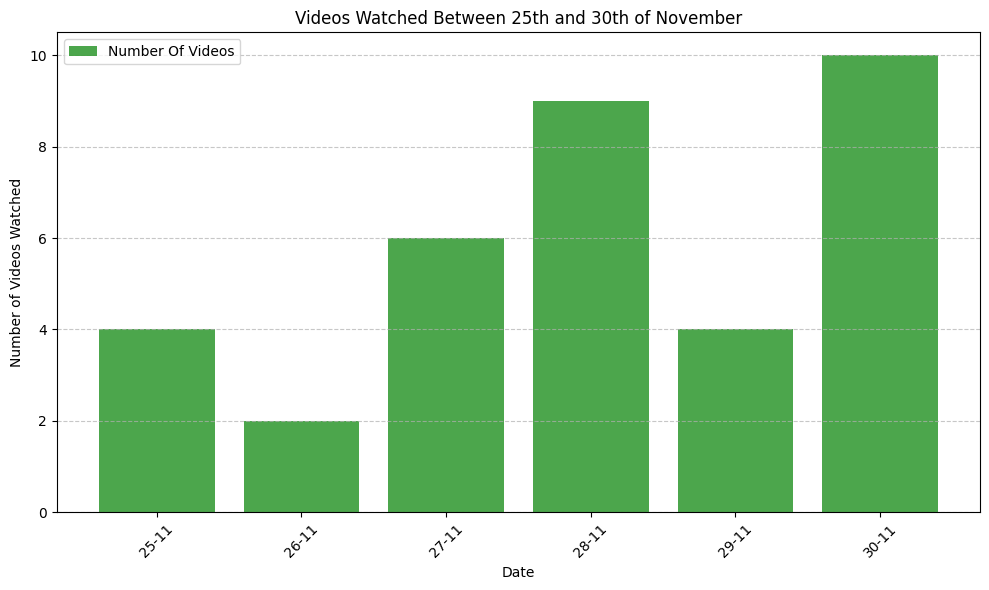

In [6]:
json_filepath = 'watch-history.json'

with open(json_filepath, 'r') as f:
    data = json.load(f)

video_counts = defaultdict(int)

for entry in data:
    time_str = entry['time']
    try:
        date = datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%S.%fZ").date()
    except ValueError:
        date = datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%SZ").date()

    if date.year == 2024 and date.month == 11:
        video_counts[date] += 1

start_date = datetime(2024, 11, 25).date()
end_date = datetime(2024, 11, 30).date()

filtered_video_counts = {date: count for date, count in video_counts.items() if start_date <= date <= end_date}

sorted_dates = sorted(filtered_video_counts.keys())

# Graphing
if sorted_dates:
    counts = [filtered_video_counts[day] for day in sorted_dates]
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_dates, counts, color='green', alpha=0.7, label='Number Of Videos')
    plt.title('Videos Watched Between 25th and 30th of November')
    plt.xlabel('Date')
    plt.ylabel('Number of Videos Watched')
    plt.xticks(sorted_dates, [day.strftime('%d-%m') for day in sorted_dates], rotation=45)
    plt.ylim(bottom=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.legend()
    plt.show()



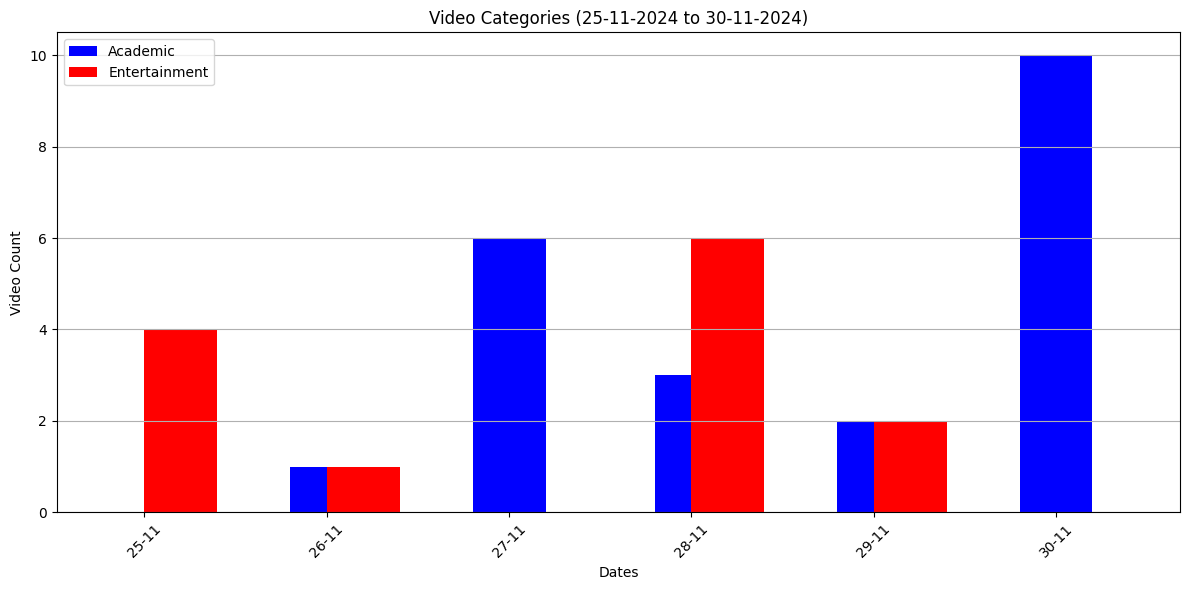

In [48]:
with open('watch-history.json', 'r') as file:
    data = json.load(file)

# Searching for keywords in the data
academic_keywords = [
'programming', 'Programming', 'c++', 'C++', 'statistics', 'Statistics', 'economy', 'Economy',
    'macroeconomy', 'Macroeconomy', 'lesson', 'Lesson', 'mathematics', 'Mathematics', 'explanation',
    'Explanation', 'function', 'Function', 'functions', 'Functions', 'coding', 'Coding',
    'codebeauty', 'Codebeauty', 'object', 'Object', 'graph', 'Graph', 'data', 'Data',
    'data science', 'Data Science', 'algorithm', 'Algorithm', 'clustering', 'Clustering',
    'science', 'Science', 'analysis', 'Analysis', 'programlama', 'Programlama', 'istatistik',
    'İstatistik', 'ekonomi', 'Ekonomi', 'makroekonomi', 'Makroekonomi', 'buders', 'Buders',
    'matematik', 'Matematik', 'anlatım', 'Anlatım', 'nesne', 'Nesne', 'grafik', 'Grafik',
    'veri', 'Veri', 'algoritma', 'Algoritma', 'veri bilimi', 'Veri Bilimi', 'bilim', 'Bilim',
    'analiz', 'Analiz', 'growth', 'Growth', 'macroeconomics', 'Macroeconomics', 'ayrık', 'Ayrık',
    'Solow', 'solow', 'Sayaç', 'Sayaç', 'tasarım', 'Tasarım', 'introduction', 'Introduction',
    'digital', 'Digital', 'dijital', 'Dijital', 'electronics', 'Electronics', 'elektronik',
    'Elektronik', 'circuit', 'Circuit', 'devre', 'Devre', 'What', 'what', 'ders', 'Ders',
    'lojik', 'Lojik', 'design', 'Design', 'devreler', 'Devreler', 'tanıtım', 'Tanıtım',
    'nedir', 'Nedir', 'clock', 'Clock', 'sinyal', 'Sinyal', 'signal', 'Signal', 'explained',
    'Explained', 'Flip-Flop', 'flip-flop', 'Flip', 'flip', 'State', 'state', 'Sequential',
    'sequential', 'Mealy', 'mealy', 'Moore', 'moore', 'ardışıl', 'Ardışıl', 'Lecture', 'lecture',
    'sıralı', 'Sıralı', 'Frequency', 'frequency', 'soru', 'Soru', 'Aritmetiği', 'aritmetiği',
    'Register', 'register', 'Counter', 'counter', 'Bit', 'bit', 'Multiplexer', 'multiplexer',
    'Boolean', 'boolean', 'Sum', 'sum',
]


def parse_date(time_str):
    try:
        if '.' in time_str:
            time_str = time_str.split('.')[0] + 'Z'
        return datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%SZ").date()
    except ValueError as e:
        raise ValueError(f"Invalid time format: {time_str}") from e

def categorize_videos_by_date(data):
    categorized_data = defaultdict(lambda: {"academic": 0, "entertainment": 0})

    for entry in data:
        time_str = entry['time']
        date = parse_date(time_str)

        title = entry['title'].lower()
        if any(keyword in title for keyword in academic_keywords):
            categorized_data[date]["academic"] += 1
        else:
            categorized_data[date]["entertainment"] += 1

    return categorized_data

categorized_data = categorize_videos_by_date(data)

start = datetime(2024, 11, 25).date()
end = datetime(2024, 11, 30).date()

period_data = {date: categorized_data[date] for date in categorized_data if start <= date <= end}

all_dates = [start + timedelta(days=i) for i in range((end - start).days + 1)]
period_data = {date: period_data.get(date, {"academic": 0, "entertainment": 0}) for date in all_dates}

dates = list(period_data.keys())
academic_counts = [period_data[date]["academic"] for date in dates]
entertainment_counts = [period_data[date]["entertainment"] for date in dates]

# Bar Chart
x = range(len(dates))
plt.figure(figsize=(12, 6))
plt.bar(x, academic_counts, width=0.4, label='Academic', align='center', color='b')
plt.bar(x, entertainment_counts, width=0.4, label='Entertainment', align='edge', color='r')

plt.title(f"Video Categories (25-11-2024 to 30-11-2024)")
plt.xlabel('Dates')
plt.ylabel('Video Count')
plt.xticks(x, [date.strftime('%d-%m') for date in dates], rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()

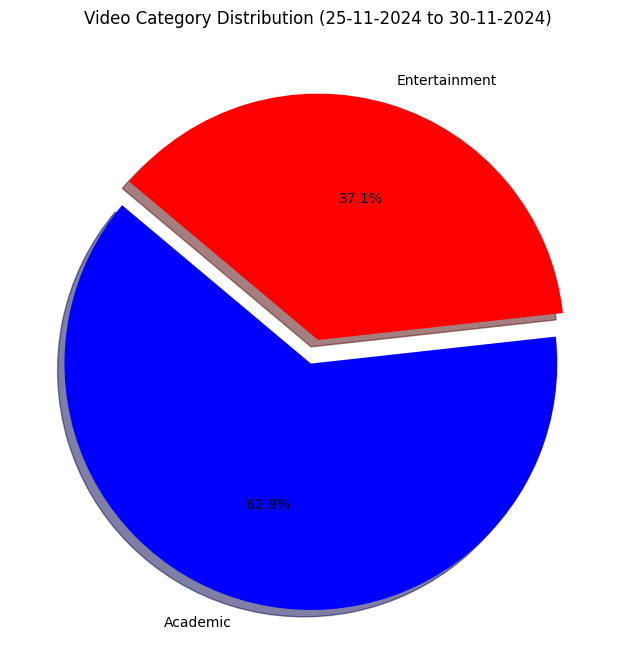

In [49]:
total_academic = sum(academic_counts)
total_entertainment = sum(entertainment_counts)

labels = ['Academic', 'Entertainment']
sizes = [total_academic, total_entertainment]
colors = ['blue', 'red']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=140
)

plt.title(f"Video Category Distribution (25-11-2024 to 30-11-2024)")
plt.show()


# Youtube Data in December
- The only full month data in my project.
- I divided every graph to maximum of 15 days to get a better visualization
- First graph is about how many videos that I watched in each day.
- Second graph is about comparing frequency of the video categories.

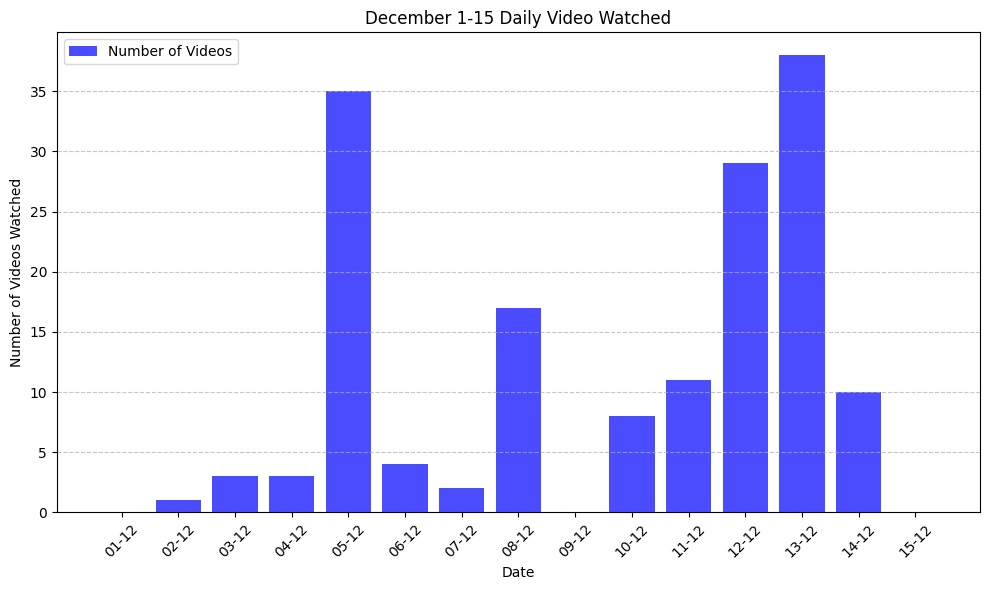

In [19]:
json_filepath = 'watch-history.json'

with open(json_filepath, 'r') as f:
    data = json.load(f)

video_counts = defaultdict(int)

for entry in data:
    time_str = entry['time']
    try:
        date = datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%S.%fZ").date()
    except ValueError:
        date = datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%SZ").date()

    if date.year == 2024 and date.month == 12:
        video_counts[date] += 1

start_date = datetime(2024, 12, 1).date()
end_date = datetime(2024, 12, 15).date()

filtered_video_counts = {date: video_counts.get(date, 0) for date in [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]}

# Graphing
sorted_dates = sorted(filtered_video_counts.keys())
counts = [filtered_video_counts[day] for day in sorted_dates]

plt.figure(figsize=(10, 6))
plt.bar(sorted_dates, counts, color='blue', alpha=0.7, label='Number of Videos')
plt.title('December 1-15 Daily Video Watched')
plt.xlabel('Date')
plt.ylabel('Number of Videos Watched')
plt.xticks(sorted_dates, [day.strftime('%d-%m') for day in sorted_dates], rotation=45)
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()


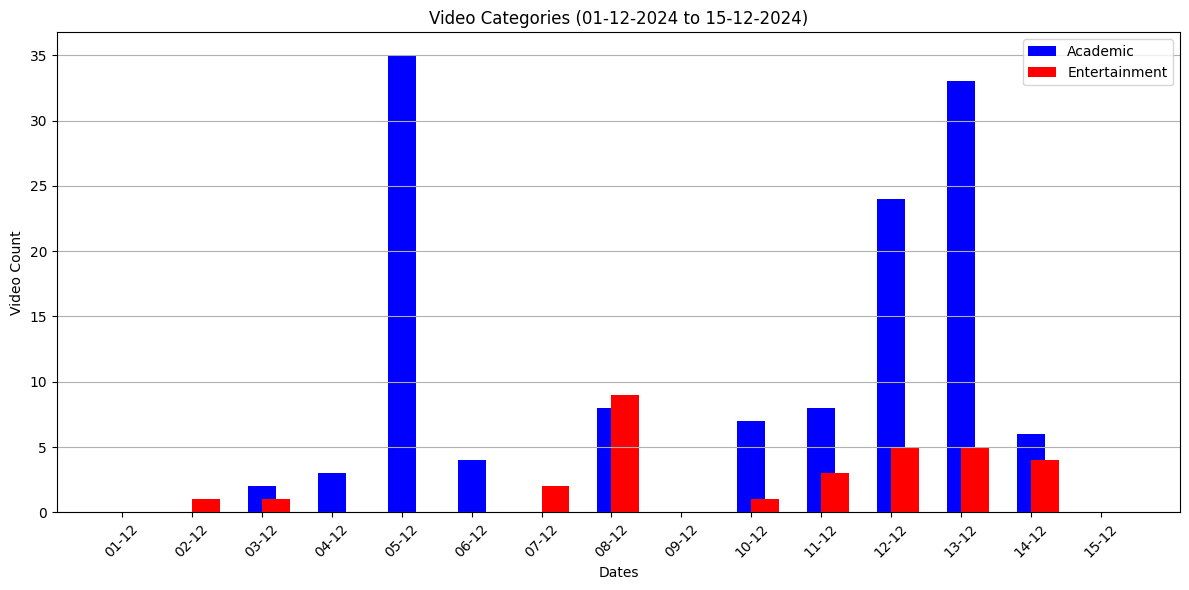

In [40]:
with open('watch-history.json', 'r') as file:
    data = json.load(file)

# Keywords
academic_keywords = [
    'programming', 'Programming', 'c++', 'C++', 'statistics', 'Statistics', 'economy', 'Economy',
    'macroeconomy', 'Macroeconomy', 'lesson', 'Lesson', 'mathematics', 'Mathematics', 'explanation',
    'Explanation', 'function', 'Function', 'functions', 'Functions', 'coding', 'Coding',
    'codebeauty', 'Codebeauty', 'object', 'Object', 'graph', 'Graph', 'data', 'Data',
    'data science', 'Data Science', 'algorithm', 'Algorithm', 'clustering', 'Clustering',
    'science', 'Science', 'analysis', 'Analysis', 'programlama', 'Programlama', 'istatistik',
    'İstatistik', 'ekonomi', 'Ekonomi', 'makroekonomi', 'Makroekonomi', 'buders', 'Buders',
    'matematik', 'Matematik', 'anlatım', 'Anlatım', 'nesne', 'Nesne', 'grafik', 'Grafik',
    'veri', 'Veri', 'algoritma', 'Algoritma', 'veri bilimi', 'Veri Bilimi', 'bilim', 'Bilim',
    'analiz', 'Analiz', 'growth', 'Growth', 'macroeconomics', 'Macroeconomics', 'ayrık', 'Ayrık',
    'Solow', 'solow', 'Sayaç', 'Sayaç', 'tasarım', 'Tasarım', 'introduction', 'Introduction',
    'digital', 'Digital', 'dijital', 'Dijital', 'electronics', 'Electronics', 'elektronik',
    'Elektronik', 'circuit', 'Circuit', 'devre', 'Devre', 'What', 'what', 'ders', 'Ders',
    'lojik', 'Lojik', 'design', 'Design', 'devreler', 'Devreler', 'tanıtım', 'Tanıtım',
    'nedir', 'Nedir', 'clock', 'Clock', 'sinyal', 'Sinyal', 'signal', 'Signal', 'explained',
    'Explained', 'Flip-Flop', 'flip-flop', 'Flip', 'flip', 'State', 'state', 'Sequential',
    'sequential', 'Mealy', 'mealy', 'Moore', 'moore', 'ardışıl', 'Ardışıl', 'Lecture', 'lecture',
    'sıralı', 'Sıralı', 'Frequency', 'frequency', 'soru', 'Soru', 'Aritmetiği', 'aritmetiği',
    'Register', 'register', 'Counter', 'counter', 'Bit', 'bit', 'Multiplexer', 'multiplexer',
    'Boolean', 'boolean', 'Sum', 'sum',
]


def parse_date(time_str):
    try:
        if '.' in time_str:
            time_str = time_str.split('.')[0] + 'Z'
        return datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%SZ").date()
    except ValueError as e:
        raise ValueError(f"Invalid time format: {time_str}") from e

def categorize_videos_by_date(data):
    categorized_data = defaultdict(lambda: {"academic": 0, "entertainment": 0})

    for entry in data:
        time_str = entry['time']
        date = parse_date(time_str)

        title = entry['title'].lower()
        if any(keyword in title for keyword in academic_keywords):
            categorized_data[date]["academic"] += 1
        else:
            categorized_data[date]["entertainment"] += 1

    return categorized_data

categorized_data = categorize_videos_by_date(data)

start = datetime(2024, 12, 1).date()
end = datetime(2024, 12, 15).date()

period_data = {date: categorized_data[date] for date in categorized_data if start <= date <= end}

all_dates = [start + timedelta(days=i) for i in range((end - start).days + 1)]
period_data = {date: period_data.get(date, {"academic": 0, "entertainment": 0}) for date in all_dates}

dates = list(period_data.keys())
academic_counts = [period_data[date]["academic"] for date in dates]
entertainment_counts = [period_data[date]["entertainment"] for date in dates]

x = range(len(dates))
plt.figure(figsize=(12, 6))
plt.bar(x, academic_counts, width=0.4, label='Academic', align='center', color='b')
plt.bar(x, entertainment_counts, width=0.4, label='Entertainment', align='edge', color='r')

plt.title(f"Video Categories (01-12-2024 to 15-12-2024)")
plt.xlabel('Dates')
plt.ylabel('Video Count')
plt.xticks(x, [date.strftime('%d-%m') for date in dates], rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()


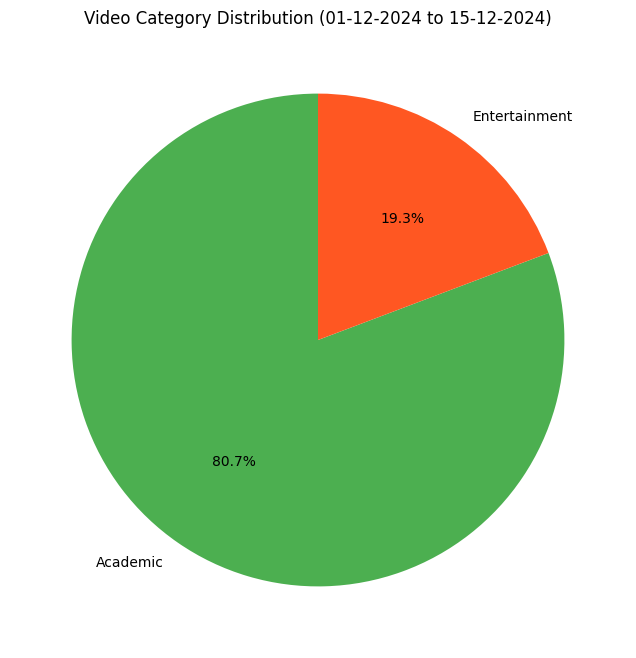

In [60]:
# Keywords
academic_keywords = [
    'programming', 'Programming', 'c++', 'C++', 'statistics', 'Statistics', 'economy', 'Economy',
    'macroeconomy', 'Macroeconomy', 'lesson', 'Lesson', 'mathematics', 'Mathematics', 'explanation',
    'Explanation', 'function', 'Function', 'functions', 'Functions', 'coding', 'Coding',
    'codebeauty', 'Codebeauty', 'object', 'Object', 'graph', 'Graph', 'data', 'Data',
    'data science', 'Data Science', 'algorithm', 'Algorithm', 'clustering', 'Clustering',
    'science', 'Science', 'analysis', 'Analysis', 'programlama', 'Programlama', 'istatistik',
    'İstatistik', 'ekonomi', 'Ekonomi', 'makroekonomi', 'Makroekonomi', 'buders', 'Buders',
    'matematik', 'Matematik', 'anlatım', 'Anlatım', 'nesne', 'Nesne', 'grafik', 'Grafik',
    'veri', 'Veri', 'algoritma', 'Algoritma', 'veri bilimi', 'Veri Bilimi', 'bilim', 'Bilim',
    'analiz', 'Analiz', 'growth', 'Growth', 'macroeconomics', 'Macroeconomics', 'ayrık', 'Ayrık',
    'Solow', 'solow', 'Sayaç', 'Sayaç', 'tasarım', 'Tasarım', 'introduction', 'Introduction',
    'digital', 'Digital', 'dijital', 'Dijital', 'electronics', 'Electronics', 'elektronik',
    'Elektronik', 'circuit', 'Circuit', 'devre', 'Devre', 'What', 'what', 'ders', 'Ders',
    'lojik', 'Lojik', 'design', 'Design', 'devreler', 'Devreler', 'tanıtım', 'Tanıtım',
    'nedir', 'Nedir', 'clock', 'Clock', 'sinyal', 'Sinyal', 'signal', 'Signal', 'explained',
    'Explained', 'Flip-Flop', 'flip-flop', 'Flip', 'flip', 'State', 'state', 'Sequential',
    'sequential', 'Mealy', 'mealy', 'Moore', 'moore', 'ardışıl', 'Ardışıl', 'Lecture', 'lecture',
    'sıralı', 'Sıralı', 'Frequency', 'frequency', 'soru', 'Soru', 'Aritmetiği', 'aritmetiği',
    'Register', 'register', 'Counter', 'counter', 'Bit', 'bit', 'Multiplexer', 'multiplexer',
    'Boolean', 'boolean', 'Sum', 'sum','Hipotez', 'hipotez','test', 'Test', 'Hypothesis', 'hypothesis',
    'Calculus', 'calculus', 'Linear', 'linear', 'Regression', 'regression', 'Learning', 'learning', 'Machine', 'machine',
]
def parse_date(time_str):
    try:
        if '.' in time_str:
            time_str = time_str.split('.')[0] + 'Z'
        return datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%SZ").date()
    except ValueError as e:
        raise ValueError(f"Invalid time format: {time_str}") from e

def categorize_videos_by_date(data):
    categorized_data = defaultdict(lambda: {"academic": 0, "entertainment": 0})

    for entry in data:
        time_str = entry['time']
        date = parse_date(time_str)

        title = entry['title'].lower()
        if any(keyword in title for keyword in academic_keywords):
            categorized_data[date]["academic"] += 1
        else:
            categorized_data[date]["entertainment"] += 1

    return categorized_data

with open('watch-history.json', 'r') as file:
    data = json.load(file)

categorized_data = categorize_videos_by_date(data)

start = datetime(2024, 12, 1).date()
end = datetime(2024, 12, 15).date()

period_data = {date: categorized_data[date] for date in categorized_data if start <= date <= end}

all_dates = [start + timedelta(days=i) for i in range((end - start).days + 1)]
period_data = {date: period_data.get(date, {"academic": 0, "entertainment": 0}) for date in all_dates}

total_academic = sum(period_data[date]["academic"] for date in all_dates)
total_entertainment = sum(period_data[date]["entertainment"] for date in all_dates)

categories = ['Academic', 'Entertainment']
counts = [total_academic, total_entertainment]
colors = ['#4CAF50', '#FF5722']

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title(f"Video Category Distribution (01-12-2024 to 15-12-2024)")
plt.show()


# Second Period of December

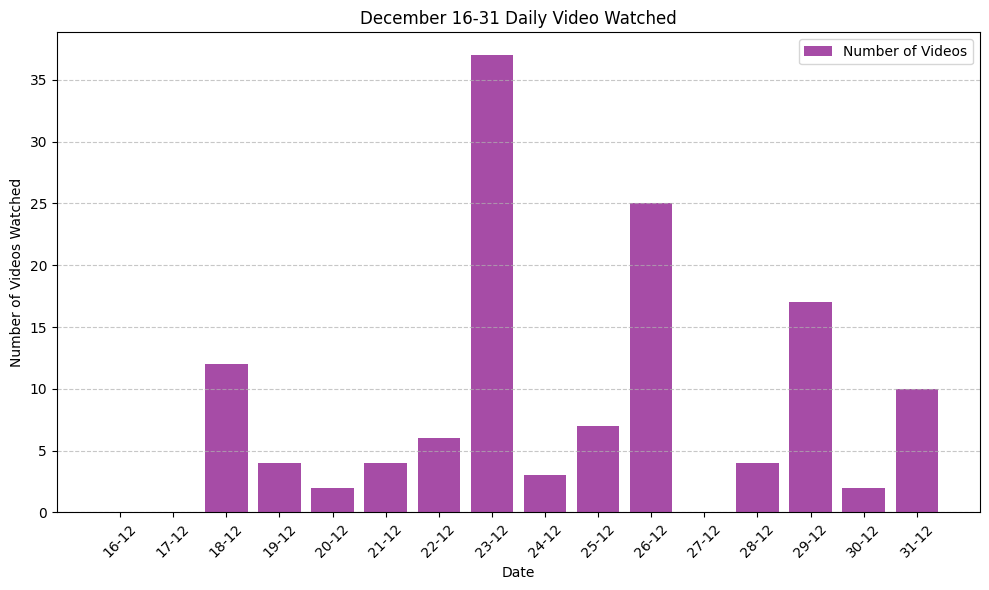

In [54]:
json_filepath = 'watch-history.json'

with open(json_filepath, 'r') as f:
    data = json.load(f)

video_counts = defaultdict(int)

for entry in data:
    time_str = entry['time']
    try:
        date = datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%S.%fZ").date()
    except ValueError:
        date = datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%SZ").date()

    if date.year == 2024 and date.month == 12:
        video_counts[date] += 1

start_date = datetime(2024, 12, 16).date()
end_date = datetime(2024, 12, 31).date()

filtered_video_counts = {date: video_counts.get(date, 0) for date in [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]}

# Graphing
sorted_dates = sorted(filtered_video_counts.keys())
counts = [filtered_video_counts[day] for day in sorted_dates]

plt.figure(figsize=(10, 6))
plt.bar(sorted_dates, counts, color='purple', alpha=0.7, label='Number of Videos')
plt.title('December 16-31 Daily Video Watched')
plt.xlabel('Date')
plt.ylabel('Number of Videos Watched')
plt.xticks(sorted_dates, [day.strftime('%d-%m') for day in sorted_dates], rotation=45)
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()


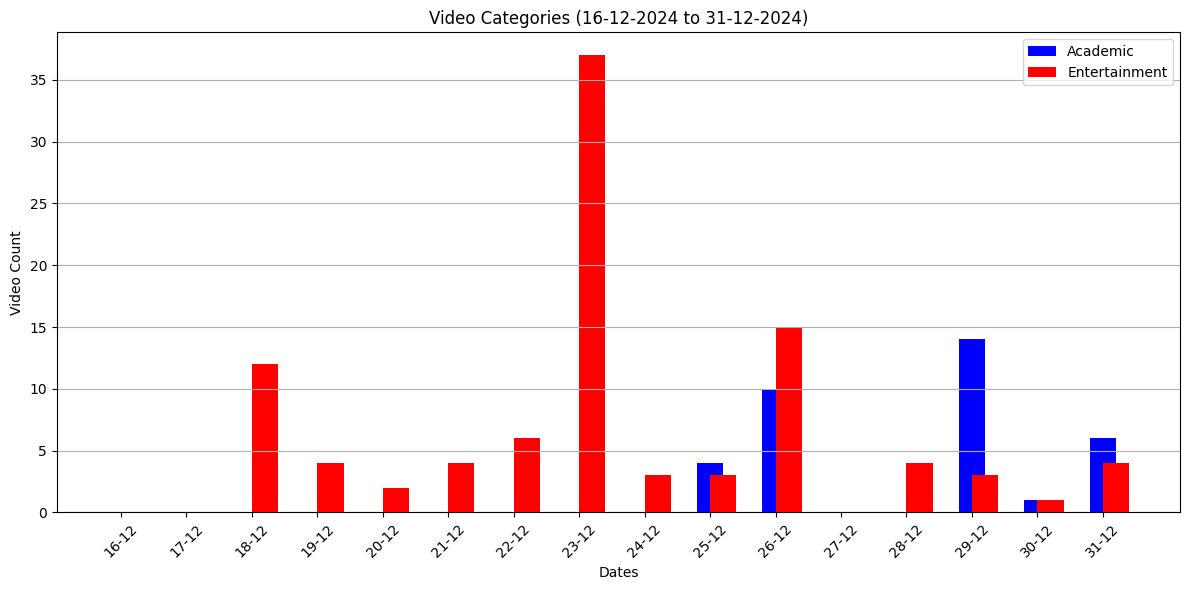

In [77]:
with open('watch-history.json', 'r') as file:
    data = json.load(file)

# Keywords
academic_keywords = [
    'programming', 'Programming', 'c++', 'C++', 'statistics', 'Statistics', 'economy', 'Economy',
    'macroeconomy', 'Macroeconomy', 'lesson', 'Lesson', 'mathematics', 'Mathematics', 'explanation',
    'Explanation', 'function', 'Function', 'functions', 'Functions', 'coding', 'Coding',
    'codebeauty', 'Codebeauty', 'object', 'Object', 'graph', 'Graph', 'data', 'Data',
    'data science', 'Data Science', 'algorithm', 'Algorithm', 'clustering', 'Clustering',
    'science', 'Science', 'analysis', 'Analysis', 'programlama', 'Programlama', 'istatistik',
    'İstatistik', 'ekonomi', 'Ekonomi', 'makroekonomi', 'Makroekonomi', 'buders', 'Buders',
    'matematik', 'Matematik', 'anlatım', 'Anlatım', 'nesne', 'Nesne', 'grafik', 'Grafik',
    'veri', 'Veri', 'algoritma', 'Algoritma', 'veri bilimi', 'Veri Bilimi', 'bilim', 'Bilim',
    'analiz', 'Analiz', 'growth', 'Growth', 'macroeconomics', 'Macroeconomics', 'ayrık', 'Ayrık',
    'Solow', 'solow', 'Sayaç', 'Sayaç', 'tasarım', 'Tasarım', 'introduction', 'Introduction',
    'digital', 'Digital', 'dijital', 'Dijital', 'electronics', 'Electronics', 'elektronik',
    'Elektronik', 'circuit', 'Circuit', 'devre', 'Devre', 'What', 'what', 'ders', 'Ders',
    'lojik', 'Lojik', 'design', 'Design', 'devreler', 'Devreler', 'tanıtım', 'Tanıtım',
    'nedir', 'Nedir', 'clock', 'Clock', 'sinyal', 'Sinyal', 'signal', 'Signal', 'explained',
    'Explained', 'Flip-Flop', 'flip-flop', 'Flip', 'flip', 'State', 'state', 'Sequential',
    'sequential', 'Mealy', 'mealy', 'Moore', 'moore', 'ardışıl', 'Ardışıl', 'Lecture', 'lecture',
    'sıralı', 'Sıralı', 'Frequency', 'frequency', 'soru', 'Soru', 'Aritmetiği', 'aritmetiği',
    'Register', 'register', 'Counter', 'counter', 'Bit', 'bit', 'Multiplexer', 'multiplexer',
    'Boolean', 'boolean', 'Sum', 'sum','Hipotez', 'hipotez','test', 'Test', 'Hypothesis', 'hypothesis',
    'Calculus', 'calculus', 'Linear', 'linear', 'Regression', 'regression', 'Learning', 'learning', 'Machine', 'machine',

]


def parse_date(time_str):
    try:
        if '.' in time_str:
            time_str = time_str.split('.')[0] + 'Z'
        return datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%SZ").date()
    except ValueError as e:
        raise ValueError(f"Invalid time format: {time_str}") from e

def categorize_videos_by_date(data):
    categorized_data = defaultdict(lambda: {"academic": 0, "entertainment": 0})

    for entry in data:
        time_str = entry['time']
        date = parse_date(time_str)

        title = entry['title'].lower()
        if any(keyword in title for keyword in academic_keywords):
            categorized_data[date]["academic"] += 1
        else:
            categorized_data[date]["entertainment"] += 1

    return categorized_data

categorized_data = categorize_videos_by_date(data)

start = datetime(2024, 12, 16).date()
end = datetime(2024, 12, 31).date()

period_data = {date: categorized_data[date] for date in categorized_data if start <= date <= end}

all_dates = [start + timedelta(days=i) for i in range((end - start).days + 1)]
period_data = {date: period_data.get(date, {"academic": 0, "entertainment": 0}) for date in all_dates}

dates = list(period_data.keys())
academic_counts = [period_data[date]["academic"] for date in dates]
entertainment_counts = [period_data[date]["entertainment"] for date in dates]

x = range(len(dates))
plt.figure(figsize=(12, 6))
plt.bar(x, academic_counts, width=0.4, label='Academic', align='center', color='b')
plt.bar(x, entertainment_counts, width=0.4, label='Entertainment', align='edge', color='r')

plt.title(f"Video Categories (16-12-2024 to 31-12-2024)")
plt.xlabel('Dates')
plt.ylabel('Video Count')
plt.xticks(x, [date.strftime('%d-%m') for date in dates], rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()

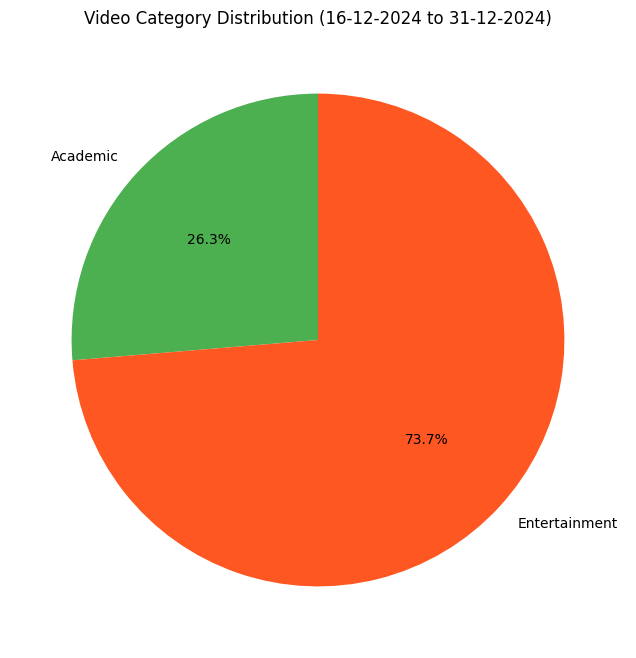

In [62]:
# Keywords
academic_keywords = [
    'programming', 'Programming', 'c++', 'C++', 'statistics', 'Statistics', 'economy', 'Economy',
    'macroeconomy', 'Macroeconomy', 'lesson', 'Lesson', 'mathematics', 'Mathematics', 'explanation',
    'Explanation', 'function', 'Function', 'functions', 'Functions', 'coding', 'Coding',
    'codebeauty', 'Codebeauty', 'object', 'Object', 'graph', 'Graph', 'data', 'Data',
    'data science', 'Data Science', 'algorithm', 'Algorithm', 'clustering', 'Clustering',
    'science', 'Science', 'analysis', 'Analysis', 'programlama', 'Programlama', 'istatistik',
    'İstatistik', 'ekonomi', 'Ekonomi', 'makroekonomi', 'Makroekonomi', 'buders', 'Buders',
    'matematik', 'Matematik', 'anlatım', 'Anlatım', 'nesne', 'Nesne', 'grafik', 'Grafik',
    'veri', 'Veri', 'algoritma', 'Algoritma', 'veri bilimi', 'Veri Bilimi', 'bilim', 'Bilim',
    'analiz', 'Analiz', 'growth', 'Growth', 'macroeconomics', 'Macroeconomics', 'ayrık', 'Ayrık',
    'Solow', 'solow', 'Sayaç', 'Sayaç', 'tasarım', 'Tasarım', 'introduction', 'Introduction',
    'digital', 'Digital', 'dijital', 'Dijital', 'electronics', 'Electronics', 'elektronik',
    'Elektronik', 'circuit', 'Circuit', 'devre', 'Devre', 'What', 'what', 'ders', 'Ders',
    'lojik', 'Lojik', 'design', 'Design', 'devreler', 'Devreler', 'tanıtım', 'Tanıtım',
    'nedir', 'Nedir', 'clock', 'Clock', 'sinyal', 'Sinyal', 'signal', 'Signal', 'explained',
    'Explained', 'Flip-Flop', 'flip-flop', 'Flip', 'flip', 'State', 'state', 'Sequential',
    'sequential', 'Mealy', 'mealy', 'Moore', 'moore', 'ardışıl', 'Ardışıl', 'Lecture', 'lecture',
    'sıralı', 'Sıralı', 'Frequency', 'frequency', 'soru', 'Soru', 'Aritmetiği', 'aritmetiği',
    'Register', 'register', 'Counter', 'counter', 'Bit', 'bit', 'Multiplexer', 'multiplexer',
    'Boolean', 'boolean', 'Sum', 'sum','Hipotez', 'hipotez','test', 'Test', 'Hypothesis', 'hypothesis',
    'Calculus', 'calculus', 'Linear', 'linear', 'Regression', 'regression', 'Learning', 'learning', 'Machine', 'machine',
]
def parse_date(time_str):
    try:
        if '.' in time_str:
            time_str = time_str.split('.')[0] + 'Z'
        return datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%SZ").date()
    except ValueError as e:
        raise ValueError(f"Invalid time format: {time_str}") from e

def categorize_videos_by_date(data):
    categorized_data = defaultdict(lambda: {"academic": 0, "entertainment": 0})

    for entry in data:
        time_str = entry['time']
        date = parse_date(time_str)

        title = entry['title'].lower()
        if any(keyword in title for keyword in academic_keywords):
            categorized_data[date]["academic"] += 1
        else:
            categorized_data[date]["entertainment"] += 1

    return categorized_data

with open('watch-history.json', 'r') as file:
    data = json.load(file)

categorized_data = categorize_videos_by_date(data)

start = datetime(2024, 12, 16).date()
end = datetime(2024, 12, 31).date()

period_data = {date: categorized_data[date] for date in categorized_data if start <= date <= end}

all_dates = [start + timedelta(days=i) for i in range((end - start).days + 1)]
period_data = {date: period_data.get(date, {"academic": 0, "entertainment": 0}) for date in all_dates}

total_academic = sum(period_data[date]["academic"] for date in all_dates)
total_entertainment = sum(period_data[date]["entertainment"] for date in all_dates)

categories = ['Academic', 'Entertainment']
counts = [total_academic, total_entertainment]
colors = ['#4CAF50', '#FF5722']

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title(f"Video Category Distribution (16-12-2024 to 31-12-2024)")
plt.show()


# Youtube Data in January
- Since the project deadline is 10th the last data is from 9th of January.
- First graph is about how many videos that I watched in each day.
- Second graph is about comparing frequency of the video categories.

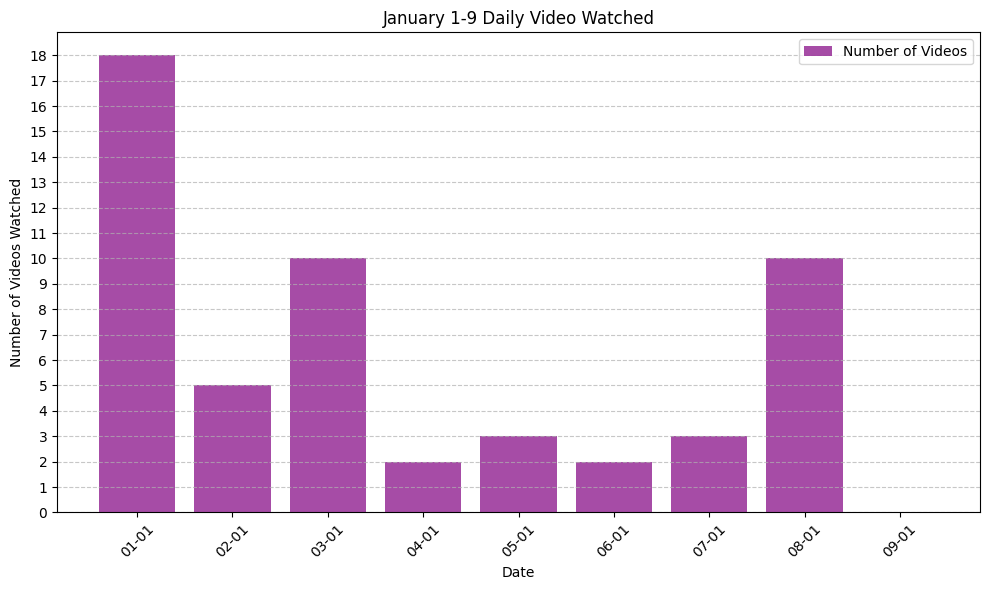

In [71]:
json_filepath = 'watch-history.json'

with open(json_filepath, 'r') as f:
    data = json.load(f)

video_counts = defaultdict(int)

for entry in data:
    time_str = entry['time']
    try:
        date = datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%S.%fZ").date()
    except ValueError:
        date = datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%SZ").date()
    if date.year == 2025 and date.month == 1:
        video_counts[date] += 1

start_date = datetime(2025, 1, 1).date()
end_date = datetime(2025, 1, 9).date()

filtered_video_counts = {date: video_counts.get(date, 0) for date in [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]}

sorted_dates = sorted(filtered_video_counts.keys())
counts = [filtered_video_counts[day] for day in sorted_dates]

plt.figure(figsize=(10, 6))
plt.bar(sorted_dates, counts, color='purple', alpha=0.7, label='Number of Videos')
plt.title('January 1-9 Daily Video Watched')
plt.xlabel('Date')
plt.ylabel('Number of Videos Watched')
plt.xticks(sorted_dates, [day.strftime('%d-%m') for day in sorted_dates], rotation=45)

y_max = max(counts) if counts else 1
plt.yticks(np.arange(0, y_max + 1, 1))

plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()


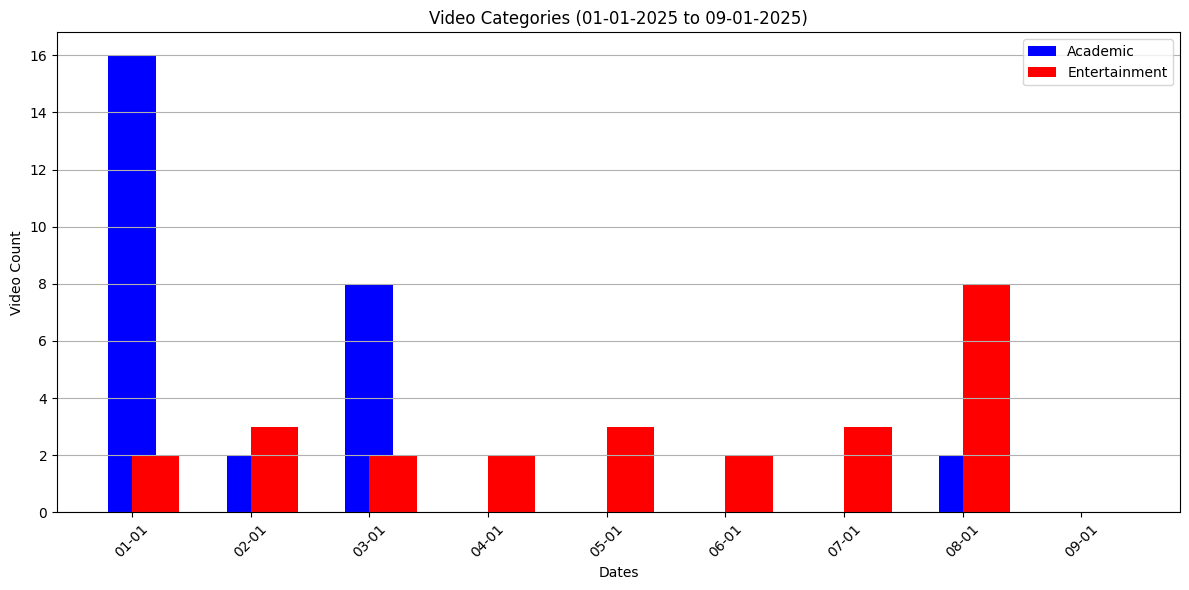

In [73]:
with open('watch-history.json', 'r') as file:
    data = json.load(file)

# Keywords
academic_keywords = [
    'programming', 'Programming', 'c++', 'C++', 'statistics', 'Statistics', 'economy', 'Economy',
    'macroeconomy', 'Macroeconomy', 'lesson', 'Lesson', 'mathematics', 'Mathematics', 'explanation',
    'Explanation', 'function', 'Function', 'functions', 'Functions', 'coding', 'Coding',
    'codebeauty', 'Codebeauty', 'object', 'Object', 'graph', 'Graph', 'data', 'Data',
    'data science', 'Data Science', 'algorithm', 'Algorithm', 'clustering', 'Clustering',
    'science', 'Science', 'analysis', 'Analysis', 'programlama', 'Programlama', 'istatistik',
    'İstatistik', 'ekonomi', 'Ekonomi', 'makroekonomi', 'Makroekonomi', 'buders', 'Buders',
    'matematik', 'Matematik', 'anlatım', 'Anlatım', 'nesne', 'Nesne', 'grafik', 'Grafik',
    'veri', 'Veri', 'algoritma', 'Algoritma', 'veri bilimi', 'Veri Bilimi', 'bilim', 'Bilim',
    'analiz', 'Analiz', 'growth', 'Growth', 'macroeconomics', 'Macroeconomics', 'ayrık', 'Ayrık',
    'Solow', 'solow', 'Sayaç', 'Sayaç', 'tasarım', 'Tasarım', 'introduction', 'Introduction',
    'digital', 'Digital', 'dijital', 'Dijital', 'electronics', 'Electronics', 'elektronik',
    'Elektronik', 'circuit', 'Circuit', 'devre', 'Devre', 'What', 'what', 'ders', 'Ders',
    'lojik', 'Lojik', 'design', 'Design', 'devreler', 'Devreler', 'tanıtım', 'Tanıtım',
    'nedir', 'Nedir', 'clock', 'Clock', 'sinyal', 'Sinyal', 'signal', 'Signal', 'explained',
    'Explained', 'Flip-Flop', 'flip-flop', 'Flip', 'flip', 'State', 'state', 'Sequential',
    'sequential', 'Mealy', 'mealy', 'Moore', 'moore', 'ardışıl', 'Ardışıl', 'Lecture', 'lecture',
    'sıralı', 'Sıralı', 'Frequency', 'frequency', 'soru', 'Soru', 'Aritmetiği', 'aritmetiği',
    'Register', 'register', 'Counter', 'counter', 'Bit', 'bit', 'Multiplexer', 'multiplexer',
    'Boolean', 'boolean', 'Sum', 'sum','Hipotez', 'hipotez','test', 'Test', 'Hypothesis', 'hypothesis',
    'Calculus', 'calculus', 'Linear', 'linear', 'Regression', 'regression', 'Learning', 'learning', 'Machine', 'machine',

]


def parse_date(time_str):
    try:
        if '.' in time_str:
            time_str = time_str.split('.')[0] + 'Z'
        return datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%SZ").date()
    except ValueError as e:
        raise ValueError(f"Invalid time format: {time_str}") from e

def categorize_videos_by_date(data):
    categorized_data = defaultdict(lambda: {"academic": 0, "entertainment": 0})

    for entry in data:
        time_str = entry['time']
        date = parse_date(time_str)

        title = entry['title'].lower()
        if any(keyword in title for keyword in academic_keywords):
            categorized_data[date]["academic"] += 1
        else:
            categorized_data[date]["entertainment"] += 1

    return categorized_data

categorized_data = categorize_videos_by_date(data)

start = datetime(2025, 1, 1).date()
end = datetime(2025, 1, 9).date()

period_data = {date: categorized_data[date] for date in categorized_data if start <= date <= end}

all_dates = [start + timedelta(days=i) for i in range((end - start).days + 1)]
period_data = {date: period_data.get(date, {"academic": 0, "entertainment": 0}) for date in all_dates}

dates = list(period_data.keys())
academic_counts = [period_data[date]["academic"] for date in dates]
entertainment_counts = [period_data[date]["entertainment"] for date in dates]

x = range(len(dates))
plt.figure(figsize=(12, 6))
plt.bar(x, academic_counts, width=0.4, label='Academic', align='center', color='b')
plt.bar(x, entertainment_counts, width=0.4, label='Entertainment', align='edge', color='r')

plt.title(f"Video Categories (01-01-2025 to 09-01-2025)")
plt.xlabel('Dates')
plt.ylabel('Video Count')
plt.xticks(x, [date.strftime('%d-%m') for date in dates], rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()

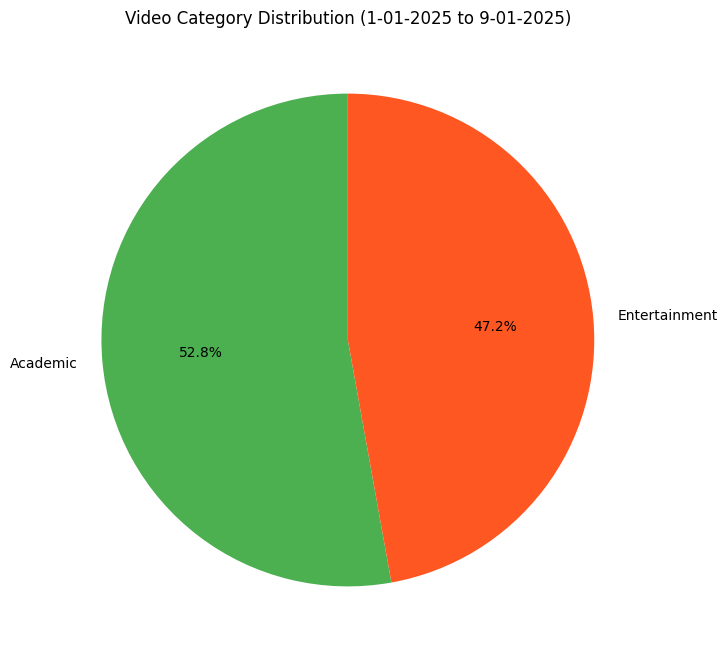

In [76]:
# Keywords
academic_keywords = [
    'programming', 'Programming', 'c++', 'C++', 'statistics', 'Statistics', 'economy', 'Economy',
    'macroeconomy', 'Macroeconomy', 'lesson', 'Lesson', 'mathematics', 'Mathematics', 'explanation',
    'Explanation', 'function', 'Function', 'functions', 'Functions', 'coding', 'Coding',
    'codebeauty', 'Codebeauty', 'object', 'Object', 'graph', 'Graph', 'data', 'Data',
    'data science', 'Data Science', 'algorithm', 'Algorithm', 'clustering', 'Clustering',
    'science', 'Science', 'analysis', 'Analysis', 'programlama', 'Programlama', 'istatistik',
    'İstatistik', 'ekonomi', 'Ekonomi', 'makroekonomi', 'Makroekonomi', 'buders', 'Buders',
    'matematik', 'Matematik', 'anlatım', 'Anlatım', 'nesne', 'Nesne', 'grafik', 'Grafik',
    'veri', 'Veri', 'algoritma', 'Algoritma', 'veri bilimi', 'Veri Bilimi', 'bilim', 'Bilim',
    'analiz', 'Analiz', 'growth', 'Growth', 'macroeconomics', 'Macroeconomics', 'ayrık', 'Ayrık',
    'Solow', 'solow', 'Sayaç', 'Sayaç', 'tasarım', 'Tasarım', 'introduction', 'Introduction',
    'digital', 'Digital', 'dijital', 'Dijital', 'electronics', 'Electronics', 'elektronik',
    'Elektronik', 'circuit', 'Circuit', 'devre', 'Devre', 'What', 'what', 'ders', 'Ders',
    'lojik', 'Lojik', 'design', 'Design', 'devreler', 'Devreler', 'tanıtım', 'Tanıtım',
    'nedir', 'Nedir', 'clock', 'Clock', 'sinyal', 'Sinyal', 'signal', 'Signal', 'explained',
    'Explained', 'Flip-Flop', 'flip-flop', 'Flip', 'flip', 'State', 'state', 'Sequential',
    'sequential', 'Mealy', 'mealy', 'Moore', 'moore', 'ardışıl', 'Ardışıl', 'Lecture', 'lecture',
    'sıralı', 'Sıralı', 'Frequency', 'frequency', 'soru', 'Soru', 'Aritmetiği', 'aritmetiği',
    'Register', 'register', 'Counter', 'counter', 'Bit', 'bit', 'Multiplexer', 'multiplexer',
    'Boolean', 'boolean', 'Sum', 'sum','Hipotez', 'hipotez','test', 'Test', 'Hypothesis', 'hypothesis',
    'Calculus', 'calculus', 'Linear', 'linear', 'Regression', 'regression', 'Learning', 'learning', 'Machine', 'machine',
]
def parse_date(time_str):
    try:
        if '.' in time_str:
            time_str = time_str.split('.')[0] + 'Z'
        return datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%SZ").date()
    except ValueError as e:
        raise ValueError(f"Invalid time format: {time_str}") from e

def categorize_videos_by_date(data):
    categorized_data = defaultdict(lambda: {"academic": 0, "entertainment": 0})

    for entry in data:
        time_str = entry['time']
        date = parse_date(time_str)

        title = entry['title'].lower()
        if any(keyword in title for keyword in academic_keywords):
            categorized_data[date]["academic"] += 1
        else:
            categorized_data[date]["entertainment"] += 1

    return categorized_data

with open('watch-history.json', 'r') as file:
    data = json.load(file)

categorized_data = categorize_videos_by_date(data)

start = datetime(2025, 1, 1).date()
end = datetime(2025, 9, 9).date()

period_data = {date: categorized_data[date] for date in categorized_data if start <= date <= end}

all_dates = [start + timedelta(days=i) for i in range((end - start).days + 1)]
period_data = {date: period_data.get(date, {"academic": 0, "entertainment": 0}) for date in all_dates}

total_academic = sum(period_data[date]["academic"] for date in all_dates)
total_entertainment = sum(period_data[date]["entertainment"] for date in all_dates)

categories = ['Academic', 'Entertainment']
counts = [total_academic, total_entertainment]
colors = ['#4CAF50', '#FF5722']

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title(f"Video Category Distribution (1-01-2025 to 9-01-2025)")
plt.show()

# The Most Important Part Of The Project (Comparing the data with exam dates)
1- In order to compare the video watched data in the exam periods we need actual exam dates. So i prepeared a mini graph below this text so you can see which exams are on which dates.

2- To compare the categorization of the videos before the exam dates i used the data from 1 and 2 days before the exam to gather more accurate data (Almost everyone studies more when there are 1-2 days left for the exam) so it makes sense.

In [91]:
from tabulate import tabulate

# Exam dates
all_exams = {
    "MATH204 Midterm 2": datetime(2024, 12, 1).date(),
    "CS204 Midterm 2": datetime(2024, 12, 7).date(),
    "CS303 Midterm 2": datetime(2024, 12, 14).date(),
    "DSA210 Final": datetime(2025, 1, 2).date(),
    "MATH204 Final": datetime(2025, 1, 4).date(),
}


exams_table = [[exam, date.strftime("%d-%m-%Y")] for exam, date in all_exams.items()]
print(tabulate(exams_table, headers=["Exam Name", "Date"], tablefmt="pretty"))


+-------------------+------------+
|     Exam Name     |    Date    |
+-------------------+------------+
| MATH204 Midterm 2 | 01-12-2024 |
|  CS204 Midterm 2  | 07-12-2024 |
|  CS303 Midterm 2  | 14-12-2024 |
|   DSA210 Final    | 02-01-2025 |
|   MATH204 Final   | 04-01-2025 |
+-------------------+------------+


# Video Categorization With Exam Dates
- This graph includes all the videos watched before exams.

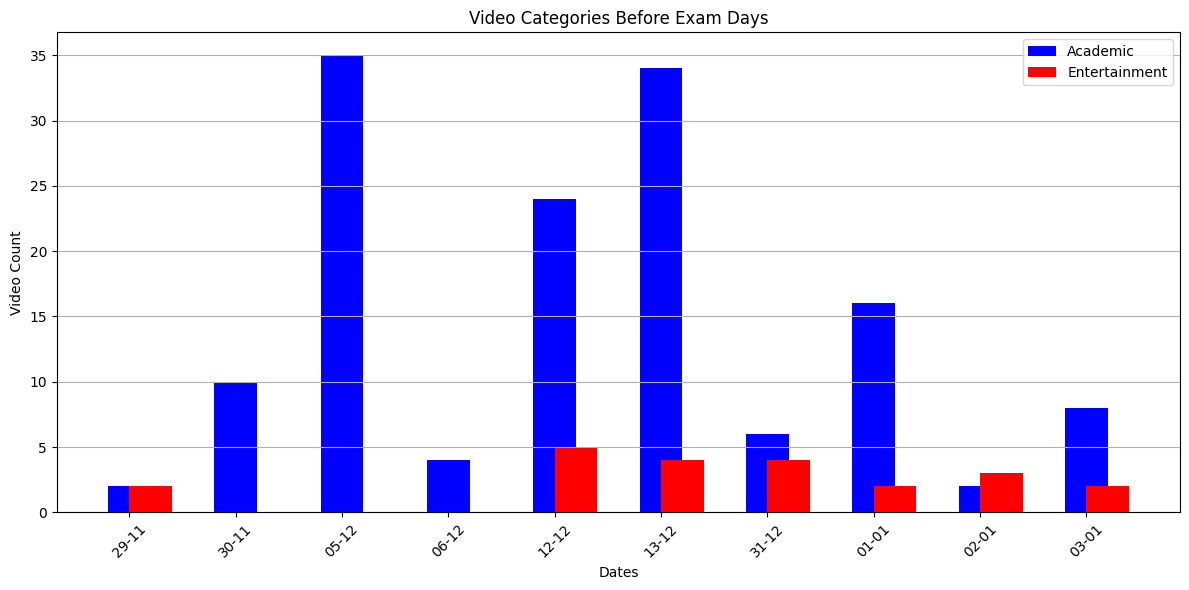

In [92]:
json_filepath = 'watch-history.json'

with open(json_filepath, 'r') as f:
    data = json.load(f)

academic_keywords = [
    'programming', 'Programming', 'c++', 'C++', 'statistics', 'Statistics', 'economy', 'Economy',
    'macroeconomy', 'Macroeconomy', 'lesson', 'Lesson', 'mathematics', 'Mathematics', 'explanation',
    'Explanation', 'function', 'Function', 'functions', 'Functions', 'coding', 'Coding',
    'codebeauty', 'Codebeauty', 'object', 'Object', 'graph', 'Graph', 'data', 'Data',
    'data science', 'Data Science', 'algorithm', 'Algorithm', 'clustering', 'Clustering',
    'science', 'Science', 'analysis', 'Analysis', 'programlama', 'Programlama', 'istatistik',
    'İstatistik', 'ekonomi', 'Ekonomi', 'makroekonomi', 'Makroekonomi', 'buders', 'Buders',
    'matematik', 'Matematik', 'anlatım', 'Anlatım', 'nesne', 'Nesne', 'grafik', 'Grafik',
    'veri', 'Veri', 'algoritma', 'Algoritma', 'veri bilimi', 'Veri Bilimi', 'bilim', 'Bilim',
    'analiz', 'Analiz', 'growth', 'Growth', 'macroeconomics', 'Macroeconomics', 'ayrık', 'Ayrık',
    'Solow', 'solow', 'Sayaç', 'Sayaç', 'tasarım', 'Tasarım', 'introduction', 'Introduction',
    'digital', 'Digital', 'dijital', 'Dijital', 'electronics', 'Electronics', 'elektronik',
    'Elektronik', 'circuit', 'Circuit', 'devre', 'Devre', 'What', 'what', 'ders', 'Ders',
    'lojik', 'Lojik', 'design', 'Design', 'devreler', 'Devreler', 'tanıtım', 'Tanıtım',
    'nedir', 'Nedir', 'clock', 'Clock', 'sinyal', 'Sinyal', 'signal', 'Signal', 'explained',
    'Explained', 'Flip-Flop', 'flip-flop', 'Flip', 'flip', 'State', 'state', 'Sequential',
    'sequential', 'Mealy', 'mealy', 'Moore', 'moore', 'ardışıl', 'Ardışıl', 'Lecture', 'lecture',
    'sıralı', 'Sıralı', 'Frequency', 'frequency', 'soru', 'Soru', 'Aritmetiği', 'aritmetiği',
    'Register', 'register', 'Counter', 'counter', 'Bit', 'bit', 'Multiplexer', 'multiplexer',
    'Boolean', 'boolean', 'Sum', 'sum', 'Hipotez', 'hipotez', 'test', 'Test', 'Hypothesis', 'hypothesis',
    'Calculus', 'calculus', 'Linear', 'linear', 'Regression', 'regression', 'Learning', 'learning', 'Machine', 'machine',
]

# Exam dates
exam_dates = {
    "Math204 Midterm2": datetime(2024, 12, 1).date(),
    "CS204 Midterm2": datetime(2024, 12, 7).date(),
    "CS303 Midterm2": datetime(2024, 12, 14).date(),
    "DSA210 Final": datetime(2025, 1, 2).date(),
    "Math204 Final": datetime(2025, 1, 4).date(),
}

categorized_data = defaultdict(lambda: {"academic": 0, "entertainment": 0})

for entry in data:
    time_str = entry['time']
    try:
        date = datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%S.%fZ").date()
    except ValueError:
        date = datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%SZ").date()

    title = entry['title'].lower()
    if any(keyword.lower() in title for keyword in academic_keywords):
        categorized_data[date]["academic"] += 1
    else:
        categorized_data[date]["entertainment"] += 1

plot_data = defaultdict(lambda: {"academic": 0, "entertainment": 0})

for exam, date in exam_dates.items():
    for offset in [1, 2]:
        day = date - timedelta(days=offset)
        if day in categorized_data:
            plot_data[day]["academic"] += categorized_data[day]["academic"]
            plot_data[day]["entertainment"] += categorized_data[day]["entertainment"]

days = sorted(plot_data.keys())
academic_counts = [plot_data[day]["academic"] for day in days]
entertainment_counts = [plot_data[day]["entertainment"] for day in days]

x = range(len(days))
plt.figure(figsize=(12, 6))
plt.bar(x, academic_counts, width=0.4, label='Academic', align='center', color='b')
plt.bar(x, entertainment_counts, width=0.4, label='Entertainment', align='edge', color='r')

plt.title("Video Categories Before Exam Days")
plt.xlabel("Dates")
plt.ylabel("Video Count")
plt.xticks(x, [day.strftime("%d-%m") for day in days], rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis="y")
plt.show()


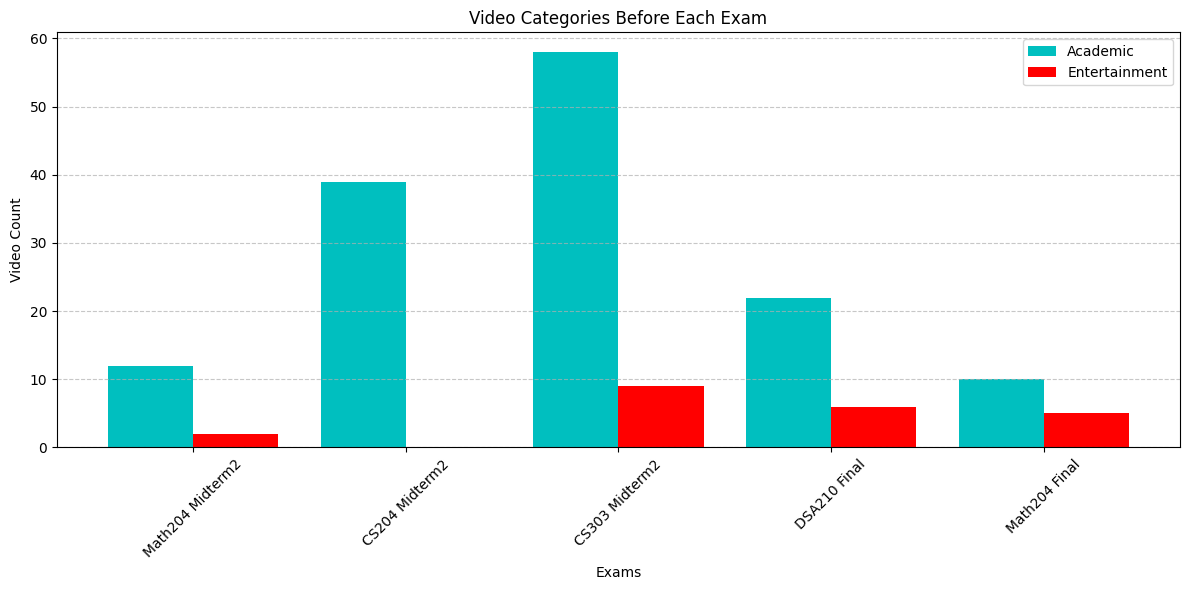

In [88]:
plot_data_by_exam = {exam: {"academic": 0, "entertainment": 0} for exam in exam_dates}

for exam, date in exam_dates.items():
    for offset in [1, 2]:
        day = date - timedelta(days=offset)
        if day in categorized_data:
            plot_data_by_exam[exam]["academic"] += categorized_data[day]["academic"]
            plot_data_by_exam[exam]["entertainment"] += categorized_data[day]["entertainment"]

exams = list(plot_data_by_exam.keys())
academic_counts = [plot_data_by_exam[exam]["academic"] for exam in exams]
entertainment_counts = [plot_data_by_exam[exam]["entertainment"] for exam in exams]

x = range(len(exams))
bar_width = 0.4

plt.figure(figsize=(12, 6))
plt.bar(x, academic_counts, width=bar_width, label='Academic', color='c', align='center')
plt.bar([i + bar_width for i in x], entertainment_counts, width=bar_width, label='Entertainment', color='r', align='center')

plt.title("Video Categories Before Each Exam")
plt.xlabel("Exams")
plt.ylabel("Video Count")
plt.xticks([i + bar_width / 2 for i in x], exams, rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# Conclusion Part
1- To make the conclusion we need to make a hyphothesis test.

# Hypothesis Definition:
Null Hypothesis (H₀): There is no relationship between the categories of videos watched (academic and entertainment) and the presence of exam dates. (They are independent.)

Alternative Hypothesis (H₁): There is a relationship between the categories of videos watched (academic and entertainment) and the presence of exam dates. (They are not independent.)

- We will use de chi-square test to test the hyphothesis and i will use the significance level as 0.05.

In [94]:
from scipy.stats import chi2_contingency
from collections import defaultdict

exam_dates = [
    datetime(2024, 12, 1).date(),
    datetime(2024, 12, 7).date(),
    datetime(2024, 12, 14).date(),
    datetime(2025, 1, 2).date(),
    datetime(2025, 1, 4).date(),
]
related_days = set()
for exam_date in exam_dates:
    for offset in [-2, -1, 0]:
        related_days.add(exam_date + timedelta(days=offset))

categorized_days = defaultdict(lambda: {"academic": 0, "entertainment": 0, "type": "normal"})
for day, counts in categorized_data.items():
    day_type = "exam-related" if day in related_days else "normal"
    categorized_days[day]["academic"] = counts["academic"]
    categorized_days[day]["entertainment"] = counts["entertainment"]
    categorized_days[day]["type"] = day_type

academic_exam = sum(v["academic"] for k, v in categorized_days.items() if v["type"] == "exam-related")
academic_normal = sum(v["academic"] for k, v in categorized_days.items() if v["type"] == "normal")
entertainment_exam = sum(v["entertainment"] for k, v in categorized_days.items() if v["type"] == "exam-related")
entertainment_normal = sum(v["entertainment"] for k, v in categorized_days.items() if v["type"] == "normal")

contingency_table = [
    [academic_exam, academic_normal],
    [entertainment_exam, entertainment_normal],
]

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(tabulate(contingency_table, headers=["Exam-Related Days", "Normal Days"], tablefmt="pretty"))
print(f"\nChi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
if p <= 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant relationship.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant relationship.")


Contingency Table:
+-------------------+-------------+
| Exam-Related Days | Normal Days |
+-------------------+-------------+
|        147        |     70      |
|        30         |     135     |
+-------------------+-------------+

Chi-Square Statistic: 90.6035
P-value: 0.0000
Degrees of Freedom: 1
Conclusion: Reject the null hypothesis. There is a significant relationship.


In [95]:
from tabulate import tabulate

# Data
data = [
    ["Academic Videos", 147, 70],
    ["Entertainment Videos", 30, 135],
]

# Print Table
print("Contingency Table:")
print(tabulate(data, headers=["Category", "Exam-Related Days", "Normal Days"], tablefmt="fancy_grid"))


Contingency Table:
╒══════════════════════╤═════════════════════╤═══════════════╕
│ Category             │   Exam-Related Days │   Normal Days │
╞══════════════════════╪═════════════════════╪═══════════════╡
│ Academic Videos      │                 147 │            70 │
├──────────────────────┼─────────────────────┼───────────────┤
│ Entertainment Videos │                  30 │           135 │
╘══════════════════════╧═════════════════════╧═══════════════╛
